In [141]:
from xgboost import DMatrix, XGBClassifier, XGBRFClassifier, XGBRegressor , XGBRFRegressor

import xgboost as xgb

from sklearn.datasets import load_boston
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error as MAE, mean_squared_error as MSE, mean_squared_log_error as MSLE, r2_score


import numpy as np

In [127]:
boston = load_boston()
boston1 = load_boston

In [128]:
boston1

<function sklearn.datasets.base.load_boston(return_X_y=False)>

In [129]:
type(boston)

sklearn.utils.Bunch

In [25]:
print(boston.keys)
print("*"*100)
print(boston.keys())

<built-in method keys of Bunch object at 0x0000019535552048>
****************************************************************************************************
dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [26]:
print(boston.data.shape)
print("*"*100)
print(boston.feature_names)
print("*"*100)
print(boston.data)

(506, 13)
****************************************************************************************************
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
****************************************************************************************************
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [24]:
print(boston.DESCR)


.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [63]:
df =  pd.DataFrame(boston.data)
df.columns = boston.feature_names
df["target"] = boston.target


X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

input_feature_name = df.iloc[:,:-1].columns.values
output_feature_name = "target"


In [62]:
print(df.columns)
print(input_feature_name)
print(output_feature_name)

df.info()

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.

In [39]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


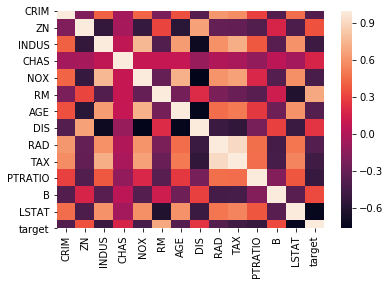

In [43]:
sb.heatmap(df.corr())

In [68]:
print(df.columns)
# sb.scatterplot(X = "CRIM", Y = "target", data=df)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


In [85]:
# convert the dataset into an optimized data structure called Dmatrix that XGBoost supports and 
# gives it acclaimed performance and efficiency gains.

data_dmatrix = DMatrix(data = X, label = Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=123)


C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\Rakesh Kumar\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [78]:
print(X_train.info())
print("*"*90)
print(X_test.info())
print("*"*90)
print(y_train)
print("*"*90)
print(y_test)
print("*"*90)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 203 to 365
Data columns (total 13 columns):
CRIM       404 non-null float64
ZN         404 non-null float64
INDUS      404 non-null float64
CHAS       404 non-null float64
NOX        404 non-null float64
RM         404 non-null float64
AGE        404 non-null float64
DIS        404 non-null float64
RAD        404 non-null float64
TAX        404 non-null float64
PTRATIO    404 non-null float64
B          404 non-null float64
LSTAT      404 non-null float64
dtypes: float64(13)
memory usage: 44.2 KB
None
******************************************************************************************
<class 'pandas.core.frame.DataFrame'>
Int64Index: 102 entries, 410 to 467
Data columns (total 13 columns):
CRIM       102 non-null float64
ZN         102 non-null float64
INDUS      102 non-null float64
CHAS       102 non-null float64
NOX        102 non-null float64
RM         102 non-null float64
AGE        102 non-null float64
DIS     

# XGBoost's hyperparameters
##plethora of tuning parameters for tree-based learners in XGBoost 

learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]

max_depth: determines how deeply each tree is allowed to grow during any boosting round.

subsample: percentage of samples used per tree. Low value can lead to underfitting.

colsample_bytree: percentage of features used per tree. High value can lead to overfitting.

n_estimators: number of trees you want to build.

objective: determines the loss function to be used like reg:linear for regression problems, 

reg:logistic for classification problems with only decision, binary:logistic for classification problems with probability.

XGBoost also supports regularization parameters to penalize models as they become more complex and 
reduce them to simple (parsimonious) models.

gamma: controls whether a given node will split based on the expected reduction in loss after the split. A higher value leads to fewer splits. Supported only for tree-based learners.

alpha: L1 regularization on leaf weights. A large value leads to more regularization.

lambda: L2 regularization on leaf weights and is smoother than L1 regularization.

In [158]:
xgboost_model = XGBRegressor(
    objective = "reg:linear",
    colsample_bytree = 0.3,
    learning_rate=0.0001,
    max_depth=5,
    alpha = 10,
    n_estimators=10
    
)


xgboost_rf_model = XGBRFRegressor(
    objective = "reg:linear",
    colsample_bytree = 0.3,
    learning_rate=0.0001,
    max_depth=5,
    alpha = 10,
    n_estimators=10
    
)

In [160]:
xgboost_model.fit(X_train, y_train)

predict_x = xgboost_model.predict(X_test)



xgboost_rf_model.fit(X_train, y_train)

predict__rf_x = xgboost_rf_model.predict(X_test)

# print(predict_x)

[13:22:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:22:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [163]:

mae = MAE(y_test, predict_x)
print("MAE : ",mae)

msle = MSLE(y_test, predict_x)
print("Mean sequare log Error : ",msle)

mse = MSE(y_test, predict_x)
print("MSE : ",mse)

r2_score_accuracy = r2_score(y_test, predict_x)
print("R2_score : ",r2_score_accuracy)


print("*"*100)

print("XGB RF Boost")

rf_mae = MAE(y_test, predict__rf_x)
print("rf MAE : ",rf_mae)

rf_msle = MSLE(y_test, predict__rf_x)
print("Mean sequare log Error rf : ",rf_msle)

rf_mse = MSE(y_test, predict__rf_x)
print("MSE rf : ",rf_mse)

rf_r2_score_accuracy = r2_score(y_test, predict__rf_x)
print("R2_score : ",rf_r2_score_accuracy)


MAE :  22.637037779887525
Mean sequare log Error :  7.411041641283697
MSE :  595.084480984287
R2_score :  -6.192591371668349
****************************************************************************************************
XGB RF Boost
rf MAE :  22.65665394137888
Mean sequare log Error rf :  7.483372359525347
MSE rf :  596.0529079063832
R2_score :  -6.204296430944032


In [164]:
rmse = np.sqrt(mse)
print("RMSE : ",rmse)
print("RMSE: %f" % (rmse))

print("*"*100)


rf_rmse = np.sqrt(rf_mse)
print("RMSE rf : ",rf_rmse)


RMSE :  24.394353465183023
RMSE: 24.394353
****************************************************************************************************
RMSE rf :  24.414194803564243


# k-fold Cross Validation using XGBoost

build more robust models, k-fold cross validation 

num_boost_round: denotes the number of trees you build (analogous to n_estimators)

metrics: tells the evaluation metrics to be watched during CV

as_pandas: to return the results in a pandas DataFrame.

early_stopping_rounds: finishes training of the model early if the hold-out metric
("rmse" in our case) does not improve for a given number of rounds.
seed: for reproducibility of results.


In [142]:
params = {
    "objective" : "reg:linear",
    "colsample_bytree" : 0.3,
    "linear_rate" : 0.1,
    "max_depth" : 10,
    "alpha" : 10
    
}

cv_result = xgb.cv(
    dtrain=data_dmatrix,
    params=params, nfold=3,
    num_boost_round=50,
    early_stopping_rounds=10,
    metrics="rmse",
    as_pandas=True,
    seed=123
)

[19:27:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:49] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [143]:
cv_result.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,17.592214,0.034443,17.643237,0.080747
1,13.024861,0.178935,13.183137,0.208026
2,10.030120,0.337487,10.327296,0.447820
3,7.838096,0.521522,8.355256,0.696739
4,6.413956,0.510535,7.123654,0.821662


In [145]:
print(cv_result["test-rmse-mean"].head(2))

0    17.643237
1    13.183137
Name: test-rmse-mean, dtype: float64


# Visualize Boosting Trees and Feature Importance

In [150]:
xgb_reg_train = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
xgb_reg_train

[19:35:19] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


ExecutableNotFound: failed to execute ['dot', '-Tpng'], make sure the Graphviz executables are on your systems' PATH

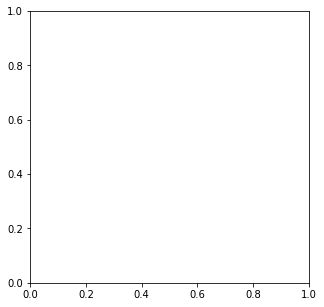

In [156]:
xgb.plot_tree(xgb_reg_train, num_trees=0)
plt.figure(figsize=(50,10)) 
#OR
# plt.rcParams["figure.figsize"] = [50,10]

plt.show()

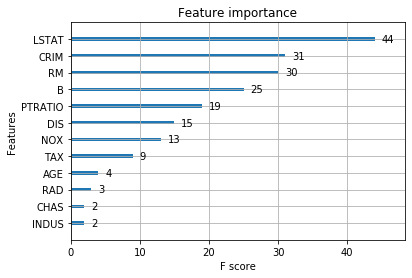

In [154]:
xgb.plot_importance(xgb_reg_train)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

In [105]:
single_input = X_test.iloc[0]
print(single_input)

print("*"*100)
single_input_value = X_test.iloc[0].values
print(single_input_value)

CRIM        51.1358
ZN           0.0000
INDUS       18.1000
CHAS         0.0000
NOX          0.5970
RM           5.7570
AGE        100.0000
DIS          1.4130
RAD         24.0000
TAX        666.0000
PTRATIO     20.2000
B            2.6000
LSTAT       10.1100
Name: 410, dtype: float64
****************************************************************************************************
[5.11358e+01 0.00000e+00 1.81000e+01 0.00000e+00 5.97000e-01 5.75700e+00
 1.00000e+02 1.41300e+00 2.40000e+01 6.66000e+02 2.02000e+01 2.60000e+00
 1.01100e+01]


In [106]:
# predict_x_single = xgboost_model.predict(single_input_value)

# print(predict_x_single)


print(type(X_test))
print(type(single_input))
print(type(single_input_value))
print(type(single_input_value.reshape(1,-1)))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
